# Part II - (Ford GO bike - trip data : full explanoration)
## by (Mohamamd Hamo)

## Introduction

## Investigation Overview
- The overall goal of this presentation is to visually communicate key insights derived from the 201902-fordgobike-tripdata.csv dataset. Through a series of well-crafted visualizations, the aim is to highlight the patterns and trends in bike usage behavior, focusing particularly on how different user types (Subscribers vs. Customers) interact with the service, and how factors such as time of day, trip duration, and user demographics influence these patterns.

### Key Insights:
1. Trip Duration by User Type: Subscribers generally have shorter trip durations compared to Customers, suggesting that Subscribers might be using the service primarily for regular, short commutes, while Customers might be engaging in longer, possibly leisure-oriented trips.

2. Peak Usage Hours: The majority of bike trips are concentrated during peak commuting hours, particularly in the morning (7-9 AM) and late afternoon (4-6 PM), indicating that the service is heavily used by commuters.

3. Demographic Influence on Usage: The data suggests that younger users tend to have longer trip durations, and there's a notable difference in trip patterns based on gender.



## Dataset Overview and Executive Summary
- The dataset used in this analysis contains bike-sharing trip data from February 2019. The dataset includes detailed information on over 183,000 trips, such as trip duration, start and end times, station locations, bike IDs, and user demographics.

### Key Findings Supported by Visualizations:

1. User Type and Trip Duration: Subscribers tend to have shorter trips, indicative of their usage patterns compared to Customers.
2. Time of Day and Trip Volume: The service experiences peak usage during typical commuting hours, which highlights the primary use case for the service.
3. Demographic Insights: Gender and age appear to have a significant impact on trip duration and frequency, with younger users and males showing different usage patterns compared to other groups.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display the first few rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## (Subscribers vs. Customers) Trip duration



We'll start by examining the distribution of trip duration across different user types (Subscribers vs. Customers). A boxplot is suitable for this analysis.

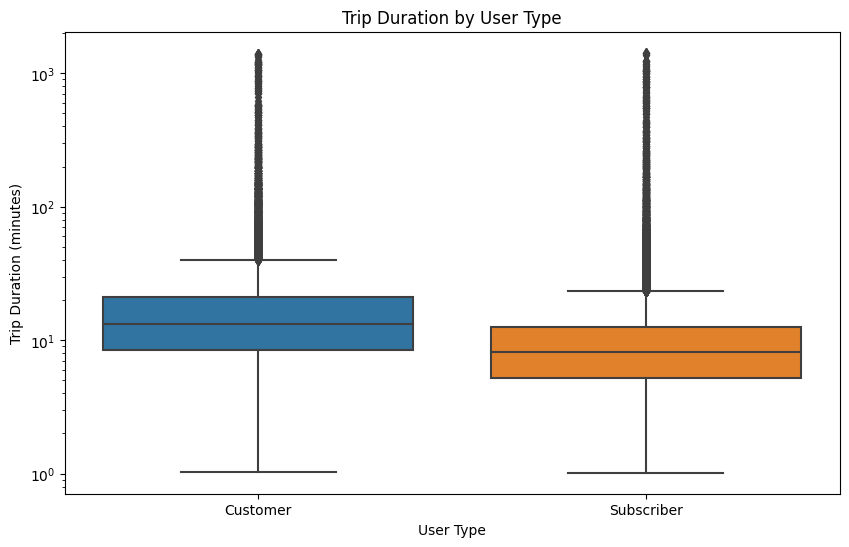

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert duration from seconds to minutes for better readability
df['duration_min'] = df['duration_sec'] / 60

# Create a boxplot for trip duration by user type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_min')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.yscale('log')  # Use a logarithmic scale to handle outliers
plt.show()


- This boxplot shows the distribution of trip durations across different user types. The use of a logarithmic scale helps manage the wide range of durations. We can observe that Customers tend to have longer trips compared to Subscriber

## Distribution of Trips by Hour and User Type

- analyze how the number of trips varies by the hour of the day, further segmented by user type. This will be visualized using a count plot.

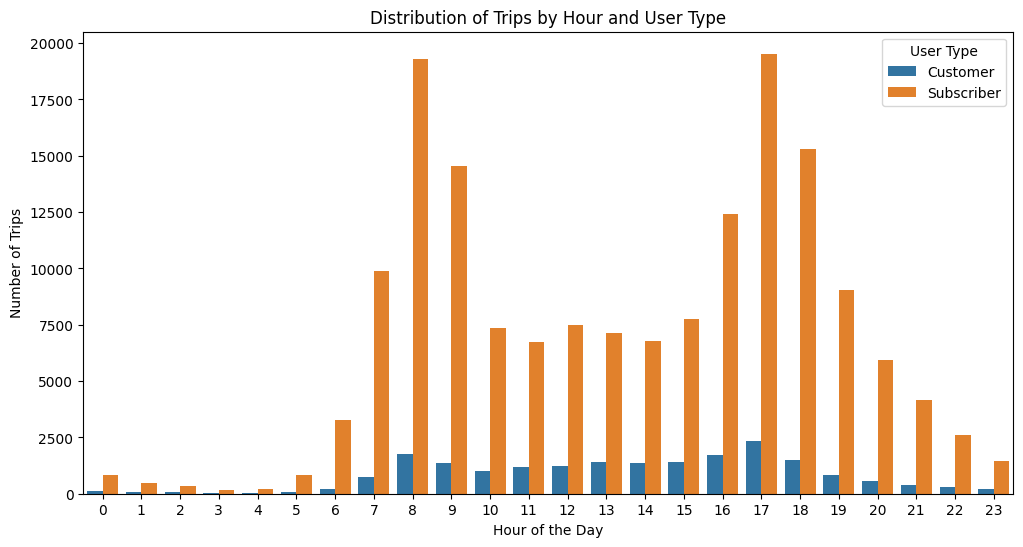

In [6]:
# Extract the hour from the start time
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

# Create a count plot for the number of trips by hour, separated by user type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Distribution of Trips by Hour and User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()


- This count plot displays the distribution of bike trips throughout the day for both Subscribers and Customers. The peak hours are during morning and evening commutes, with Subscribers showing a more pronounced peak during these times, which suggests they use bikes primarily for commuting.



## Visualization Idea: Analysis of Trip Duration Distribution

By plotting the distribution of trip durations, we can observe how frequently different trip lengths occur. This allows us to identify typical trip durations and spot any outliers, helping us understand user behavior and optimize services based on common trip patterns.



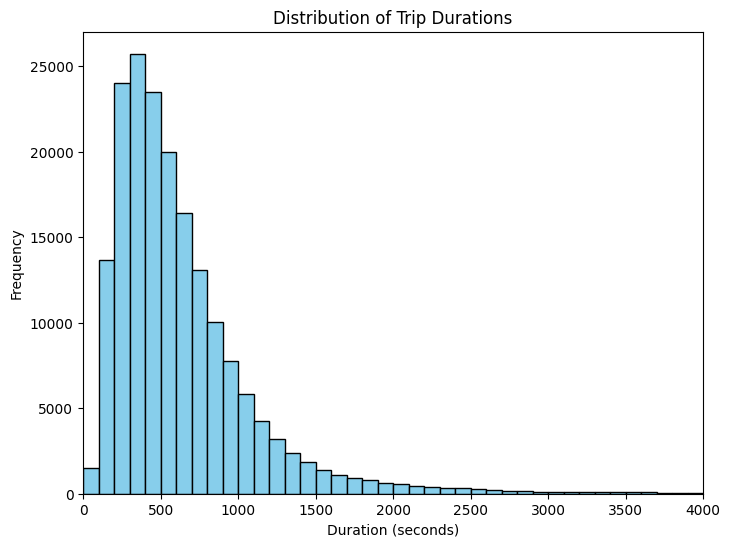

In [11]:
def plot_trip_duration_distribution(df):
    plt.figure(figsize=(8, 6))
    bins = np.arange(0, df['duration_sec'].max()+100, 100)
    plt.hist(data=df, x='duration_sec', bins=bins, color='skyblue', edgecolor='black')
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.xlim(0, 4000)
    plt.show()

plot_trip_duration_distribution(df)


## Explanation of the Plot:
#### Purpose:
The goal of this analysis is to visualize the distribution of trip durations in the dataset. By plotting a histogram, we can observe how frequently different trip durations occur, allowing us to identify patterns and potential outliers in the data.

#### Key Components:
1. **Histogram**:
    - A histogram is used to represent the distribution of trip durations. The data is grouped into bins of 100-second intervals, which provides a good balance between detail and readability.

2. **X-axis (Duration in Seconds)**:
    - The x-axis represents the trip duration in seconds. To focus on the majority of the data, the x-axis is limited to a range of 0 to 4000 seconds, avoiding distortion caused by a few long-duration outliers.

3. **Y-axis (Frequency)**:
    - The y-axis represents the frequency of trips, indicating how many trips fall into each duration bin.

#### Interpretation:
- The histogram likely shows a high frequency of shorter trips, with the number of trips decreasing as the duration increases. This trend is typical in ride-sharing or bike-sharing datasets, where most users opt for relatively short trips.
- The plot may also reveal outliers, which are less frequent but represent trips with unusually long durations.

#### Conclusion:
This visualization provides insight into the typical duration of trips within the dataset. Understanding the distribution of trip durations can inform decisions related to service optimization, user experience, and marketing strategies.


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
